# nyc_taxi_trip_duration final

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set()

In [2]:
df=pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
print("Shape:- \n",df.shape)
print("\n\nColumns:- \n",df.columns)
print("\n\nData Types:- \n",df.dtypes)
print("\n\nPrinting Data:- \n")
df.head()

Shape:- 
 (729322, 11)


Columns:- 
 Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


Data Types:- 
 id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


Printing Data:- 



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


# Trip Duration
✔ I am firstly going to find out the largest and smallest occurring Trip_Duration values.

In [4]:
print('The value of largest 5 trip duration values are as follows : \n {} '.format(df['trip_duration'].nlargest(5)))
print('\nThe the number of rows their trip duration values equals to 1 is {}'.format(len(df[df['trip_duration']==1 ])))

The value of largest 5 trip duration values are as follows : 
 21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
Name: trip_duration, dtype: int64 

The the number of rows their trip duration values equals to 1 is 13


✔ As i see above result that there is 1 very large value and 13 values with 1 second as its duration which is absurd. Hence i are dropping these rows.

In [5]:
df=df[df.trip_duration!=df.trip_duration.max()]
df=df[df.trip_duration!=df.trip_duration.min()]

✔ I am going to create another column with the trip_duration represented in hours. This will be later used for finding out the speed of each trips

In [6]:
df['trip_duration_hour']=df['trip_duration']/3600 

# Counting Passengers
✔ i will have a look at the passenger count frequencies

In [7]:
df.passenger_count.value_counts()

passenger_count
1    517403
2    105096
5     38926
3     29692
6     24107
4     14050
0        32
7         1
9         1
Name: count, dtype: int64

✔ as i am seeing above output the no of records with passenger count 0, 9 and 7 are very small compared to the entire data set. Hence, i will drop the values.

In [8]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

# Pickup_datetime and Dropoff_datetime
✔ I am converting these 2 columns into datetime type.
✔ And then i created new columns depicting the month and day of the week the particular trip took place.

In [9]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

# The distribution of the pickup and drop off months distributions

In [10]:
df['pickup_month'].value_counts()

pickup_month
3    128307
4    125627
5    124194
2    119354
6    117404
1    114388
Name: count, dtype: int64

In [11]:
df['dropoff_month'].value_counts()

dropoff_month
3    128275
4    125626
5    124229
2    119351
6    117378
1    114362
7        53
Name: count, dtype: int64

✔ All months has uniform distribution of trips. No data is present for pickup months beyond June.  
✔ There are few data present in July for drop off months. It may be outlier as well.  
✔ For the drop offs done in July i will find the frequency distribution of the corresponding pickup month. Also will Find corresponding date.

In [12]:
print(df[df.dropoff_month==7].pickup_datetime.dt.month.value_counts())
print(df[df.dropoff_month==7].pickup_datetime.dt.day.value_counts())

pickup_datetime
6    53
Name: count, dtype: int64
pickup_datetime
30    53
Name: count, dtype: int64


✔ As i am looking that all the pickups were done on 30th June for drop offs on July. 
# Trip Distance, Speed, Time
✔ I am creating a function which returns the distance between a pair of latitudes and longitudes using the haversine distance formula.

In [13]:
#To calculate the distance from latitudes and longitudes
from math import radians, cos, sin, asin, sqrt
def haversine(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude 
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

✔ Now apply this function to each of the rows and create a new feature distance which stores the distance between the pickup and dropoff points in kilometers.

In [14]:
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)

✔ Now look at the distribution of this distance feature against the trip_duration value.

<Axes: xlabel='distance', ylabel='trip_duration'>

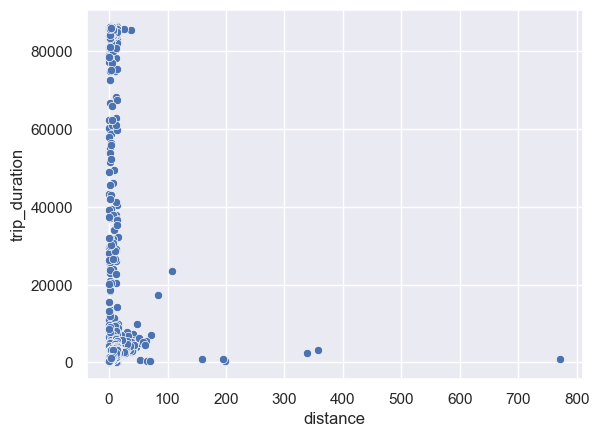

In [15]:
sns.scatterplot(x='distance',y='trip_duration',data=df)

✔ I can see here several outliers with values beyond 200km and many values with trip_distance as 0km. These may be the rows showing cancelled rides. Lets have a look at how many such rides are there.

In [16]:
print('The no of rides with distance = 0 are {}'.format(len(df[df.distance==0])))

The no of rides with distance = 0 are 2889


✔ That’s quite a number, I will not drop these rows. Instead, I will replace these datas with the average distance.

In [17]:
mean_dist=df['distance'].mean()
df.loc[df['distance']==0,'distance']=mean_dist

✔ I will now create a new feature called speed. This will help us in identifying data points where time taken and distance covered does not match up. i will also have a look at the distribution of trip speed.

<Axes: >

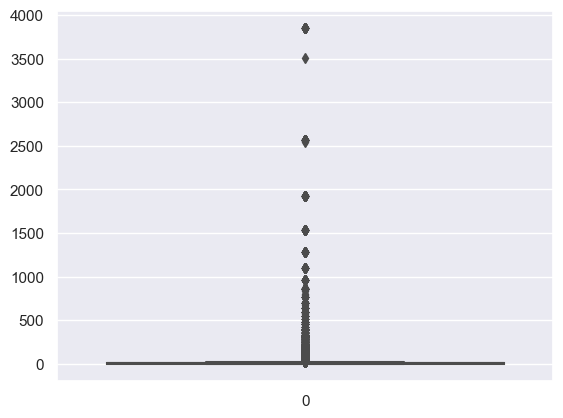

In [18]:
df['speed']=df['distance']/df['trip_duration_hour']
sns.boxplot(df['speed'])

✔ As I see above several outliers are there. The average speed of a taxi in New York City is about 11 km/hour. The data has several data points with a speed way beyond that.  
# The Distribution of the distance variable against the trip duration in hour feature.

<Axes: xlabel='distance', ylabel='trip_duration_hour'>

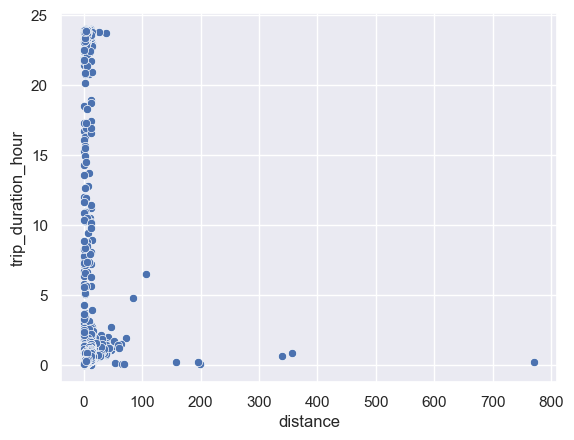

In [19]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=df)

✔ Here I see several data points where the distance is < 20 km and the time taken to be >10 hours. This is very absurd as the avg speed is 11 km/hour.  
✔ Lets log transform these columns and have a look at the distribution.

<Axes: xlabel='log_distance', ylabel='log_trip_duration'>

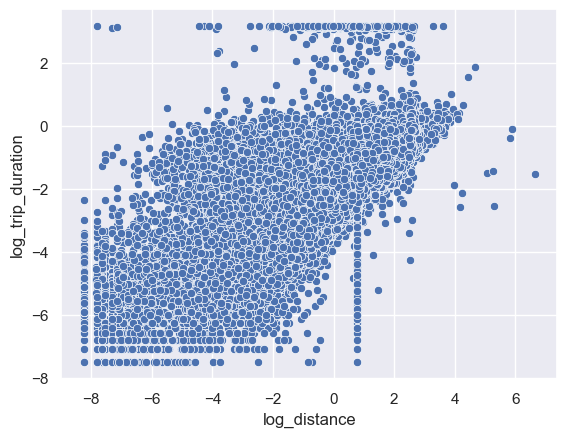

In [20]:
df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

✔ Here, I see that the log transformed value of trip duration and distance has a somewhat linear relationship.  
✔ But still there are some anomalous data points where the duration value is not changing even with the change in distance.  
# Drop the rows beyond log_trip_duration > 2

In [21]:
df=df[df.log_trip_duration<=2]

# I Have added several columns to our data set right now lets look them.

In [22]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_hour', 'pickup_day', 'dropoff_day',
       'pickup_month', 'dropoff_month', 'distance', 'speed', 'log_distance',
       'log_trip_duration'],
      dtype='object')

✔ I will not use all of the columns to build our model as this would make the model complex. icreate a new data frame <u><b><font color ="GREEN">data2</font></b></u> to select only the features which had some effect on our target variable <font color ="GREEN"> trip_duration </font>.   

✔ I dropped certain features as they were transformed to other features  
✔ I dropped the nominal features like: latitude longitudes were converted to distance,pickup and drop off datetime were converted to months and weekdays etc.

In [24]:
data2=df.loc[:,['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month','dropoff_month','speed','log_distance','distance']]

✔ I will now transform the categorical features from data2 dataframe through one hot encoding.

In [26]:
data2=pd.get_dummies(data2,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month'])

# The correlation heatmap between each features.

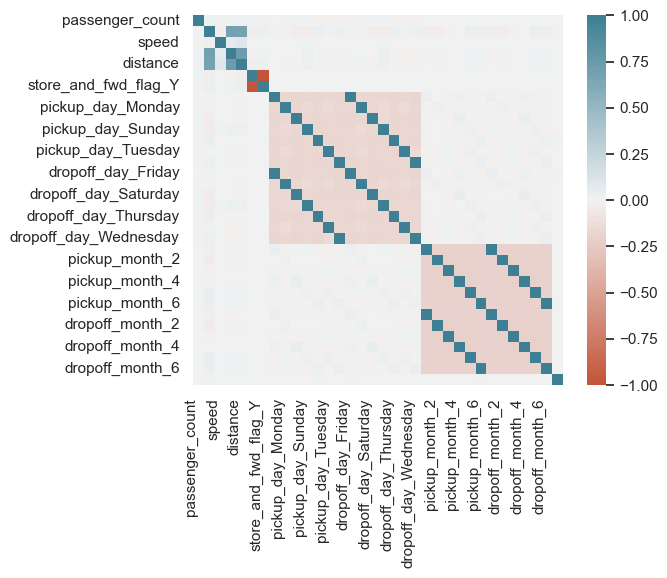

In [27]:
corr = data2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='right'
);

✔ isee that some features has high correlation with other features and some are not correlated at all.  
✔ First I will create a model with the mean of trip duration as the prediction.  
✔ Then i will create a base line model with only distance and it has a correlation > 5 with trip_duration.  
✔ Next, i will choose the other features which are positively correlated with trip_duration and create the third model.  
✔ I will split our data into 2 parts. The first part i will use to train our data and the 2nd part will be used for testing.  
✔ Within the first part i will use K-Fold cross validation using this. (k=20)  
✔ defining the baseline model columns, columns to be used in the actual model building and the target column.  
✔ I have removed the speed feature from the predictor columns as it highly correlated with distance and can lead to multicollinearity.

In [28]:
base_line_col=['distance']

In [29]:
predictor_cols=['passenger_count','distance','store_and_fwd_flag_N','store_and_fwd_flag_Y','pickup_day_Friday','pickup_day_Monday',
                'pickup_day_Saturday','pickup_day_Sunday','pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','dropoff_day_Friday',
                'dropoff_day_Monday','dropoff_day_Saturday','dropoff_day_Sunday','dropoff_day_Thursday','dropoff_day_Tuesday',
                'dropoff_day_Wednesday','pickup_month_1','pickup_month_5','pickup_month_6','dropoff_month_1','dropoff_month_5',
                'dropoff_month_6']
predictor_cols

['passenger_count',
 'distance',
 'store_and_fwd_flag_N',
 'store_and_fwd_flag_Y',
 'pickup_day_Friday',
 'pickup_day_Monday',
 'pickup_day_Saturday',
 'pickup_day_Sunday',
 'pickup_day_Thursday',
 'pickup_day_Tuesday',
 'pickup_day_Wednesday',
 'dropoff_day_Friday',
 'dropoff_day_Monday',
 'dropoff_day_Saturday',
 'dropoff_day_Sunday',
 'dropoff_day_Thursday',
 'dropoff_day_Tuesday',
 'dropoff_day_Wednesday',
 'pickup_month_1',
 'pickup_month_5',
 'pickup_month_6',
 'dropoff_month_1',
 'dropoff_month_5',
 'dropoff_month_6']

In [30]:
target_col=['trip_duration']

✔ I will define a function which will take the model object, the test data, the train data, the predictor columns and the target columns.  
✔ I will use Root Means Squared Error as the evaluation metric.
The function will print out the Root Mean Square Error (RMSE) of the train data, the average value of the RMSE at each fold of K-Fold cross validation and the test data.  
✔ It will also return the predicted values on the test data. ihave imported the required libraries.

In [31]:
from sklearn import  metrics
from sklearn.model_selection import cross_val_score
def modelfit(estimator,data_train,data_test,predictors,target):
    #print(data_train.head())
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    train_pred=estimator.predict(data_train[predictors])
    #cross_validation score
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=20,scoring='neg_mean_squared_error')
    
    cv_score=np.sqrt(np.abs(cv_score))
    #Print model report:
    print ("\nModel Report")
    print ("RMSE on Train Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_train.loc[:,target].values, train_pred)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    test_pred=estimator.predict(data_test[predictors])
    print ("RMSE on Test Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_test.loc[:,target].values, test_pred)))
    
    return test_pred

✔ I will now split the data into train and test data into 80:20 ratio.
# Splitting the data into train and test data into 80:20 ratio.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
validation_size = 0.20
seed = 7
X_train, X_test = train_test_split(data2,test_size=validation_size, random_state=seed)

✔ I will first create a model using the mean value as the predicted value for each test data point.

In [33]:
mean_pred=np.repeat(X_train[target_col].mean(),len(X_test[target_col]))
from sklearn.metrics import mean_squared_error as mae
sqrt(mae(X_test[target_col],mean_pred))

664.1583834380903

The Root Means Squared Error (RMSE) from this is 664.1583834380903
  
✔ iwill now use this value as the base and try to achieve a RMSE less than this.  
✔ I will take the distance feature as the only predictor columns and build a linear regression model.  
✔ iwill have a look at the RMSE obtained.

In [38]:
from sklearn.linear_model import LinearRegression

# Assuming modelfit() is a function you've defined elsewhere

# Create a linear regression model
alg1 = LinearRegression()

print('The baseline model')
# Assuming modelfit() returns predictions y_pred
y_pred = modelfit(alg1, X_train, X_test, base_line_col, target_col)

# Get the coefficients of the model
coef1 = alg1.coef_

# Print the coefficients
print('The coefficient is {}'.format(coef1))



The baseline model

Model Report
RMSE on Train Data: 463
CV Score : Mean - 461.4 | Std - 47.83 | Min - 420.1 | Max - 592.6
RMSE on Test Data: 577.6
The coefficient is [[187.78103658]]


✔ As I can see, all the values are much less than the mean prediction RMSE.  
✔ Thus our model worked better. i printed the coefficient fitted to the model as well.  
✔ Now iwill take all the values of the predictor columns and build a regression model.
# Building a regression model.


Model Report
RMSE on Train Data: 458.1
CV Score : Mean - 456.5 | Std - 48.5 | Min - 415.3 | Max - 589.3
RMSE on Test Data: 573.9
The coeffient is 
dropoff_month_1         -406.269387
pickup_day_Sunday       -312.066310
dropoff_month_6         -264.566340
dropoff_day_Thursday    -191.305679
pickup_day_Monday       -162.831646
dropoff_day_Friday      -142.264183
dropoff_month_5          -66.639709
dropoff_day_Wednesday    -42.992214
pickup_day_Saturday      -39.723557
store_and_fwd_flag_N     -30.398414
pickup_day_Tuesday       -21.420605
dropoff_day_Saturday      -5.517513
passenger_count            4.979184
store_and_fwd_flag_Y      30.398414
dropoff_day_Tuesday       51.801266
pickup_day_Wednesday     101.219826
pickup_month_5           120.155982
dropoff_day_Monday       122.898954
pickup_day_Friday        181.180241
distance                 187.989653
dropoff_day_Sunday       207.379369
pickup_day_Thursday      253.642053
pickup_month_6           319.889635
pickup_month_1          

<Axes: title={'center': 'Model Coefficients'}>

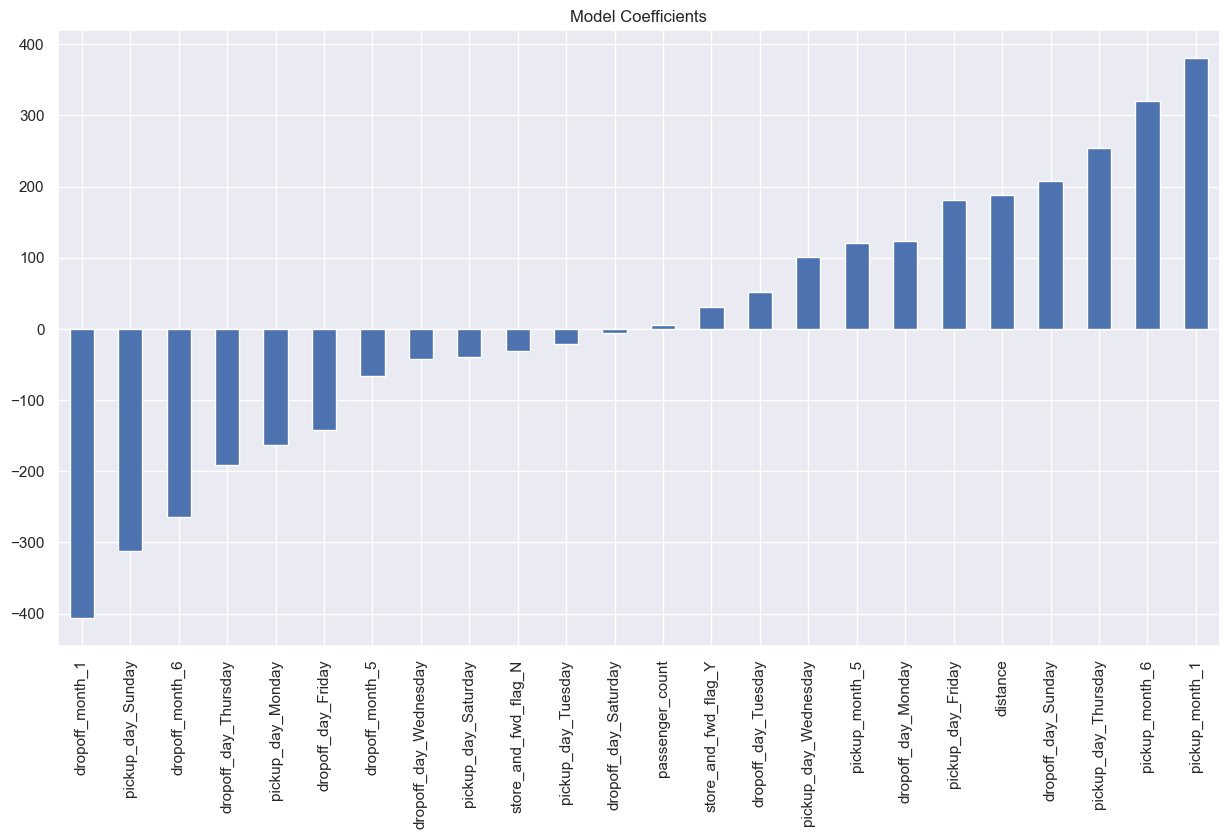

In [41]:
alg2 = LinearRegression()
y_pred=modelfit(alg2, X_train, X_test, predictor_cols,target_col)
coef1 = pd.Series(alg2.coef_[0], predictor_cols).sort_values()
print('The coeffient is \n{}'.format(coef1))
coef1.plot(kind='bar', title='Model Coefficients', figsize=(15,8))

# Conclusion:- 
# I see that the regression model with all the columns performed even better. I also plotted the coefficients fitted for each feature.  

# <center>Thank You.</center>